In [1]:
import numpy as np
import napari
from napari_skimage_regionprops import regionprops_table_all_frames, regionprops_table
import pandas as pd

In [2]:
viewer = napari.Viewer()

INFO:xmlschema:Resource 'XMLSchema.xsd' is already loaded


We define an example dataset with two time points. The intensity in the image is higher in frame 1 compared to frame 0.

In [3]:
image = np.asarray([
    [[[1,2],[3,4]]],
    [[[5,6],[7,8]]]
])

labels = np.asarray([
    [[[1,2],[3,4]]],
    [[[1,2],[3,4]]]
])

viewer.add_image(image)
labels_layer = viewer.add_labels(labels)

We can analyse the intensity in the single frame like this:

In [4]:
stats = regionprops_table(image[0], labels[0], size=False)
pd.DataFrame(stats)

,label,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity
0,1,1.0,1.0,1.0,0.0
1,2,2.0,2.0,2.0,0.0
2,3,3.0,3.0,3.0,0.0
3,4,4.0,4.0,4.0,0.0


By also passing a viewer and not indexing `image` and `labels`, you can analyse the currently selected frame:

In [5]:
stats = regionprops_table(image, labels, size=False, napari_viewer=viewer)
pd.DataFrame(stats)

""


There's no output, but the napari viewer contains a new table widget.

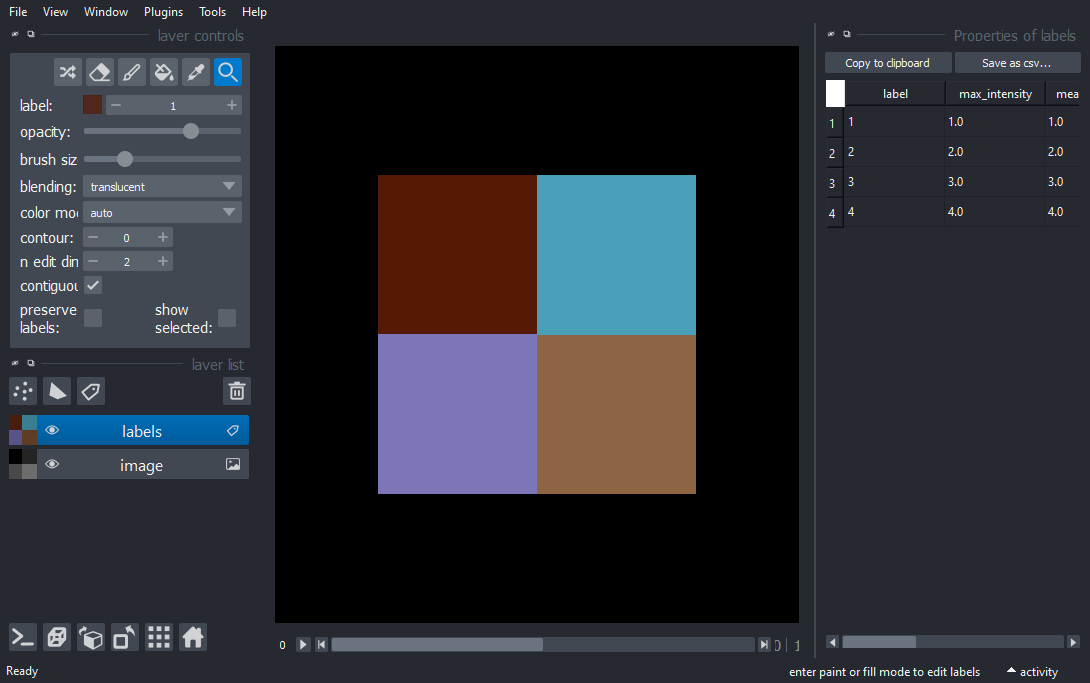

In [6]:
napari.utils.nbscreenshot(viewer)

Furthermore, we can read this table out of the `labels_layer`:

In [7]:
labels_layer.properties

{'label': array([1, 2, 3, 4]),
 'max_intensity': array([1., 2., 3., 4.]),
 'mean_intensity': array([1., 2., 3., 4.]),
 'min_intensity': array([1., 2., 3., 4.]),
 'standard_deviation_intensity': array([0., 0., 0., 0.]),
 'index': array([1, 2, 3, 4])}

To retrieve the results for all frames we can call this function:

In [8]:
stats = regionprops_table_all_frames(image, labels, size=False)
pd.DataFrame(stats)

analyzing frame 0
analyzing frame 1


,label,max_intensity,mean_intensity,min_intensity,standard_deviation_intensity,frame
0,1,1.0,1.0,1.0,0.0,0
1,2,2.0,2.0,2.0,0.0,0
2,3,3.0,3.0,3.0,0.0,0
3,4,4.0,4.0,4.0,0.0,0
4,1,5.0,5.0,5.0,0.0,1
5,2,6.0,6.0,6.0,0.0,1
6,3,7.0,7.0,7.0,0.0,1
7,4,8.0,8.0,8.0,0.0,1


In [9]:
regionprops_table_all_frames(image, labels, size=False, napari_viewer=viewer)

analyzing frame 0
analyzing frame 1


Status bar display of label properties disabled because labels/indices exist multiple times (napari-skimage-regionprops)


Also this is not returned, but the viewer's table updated:

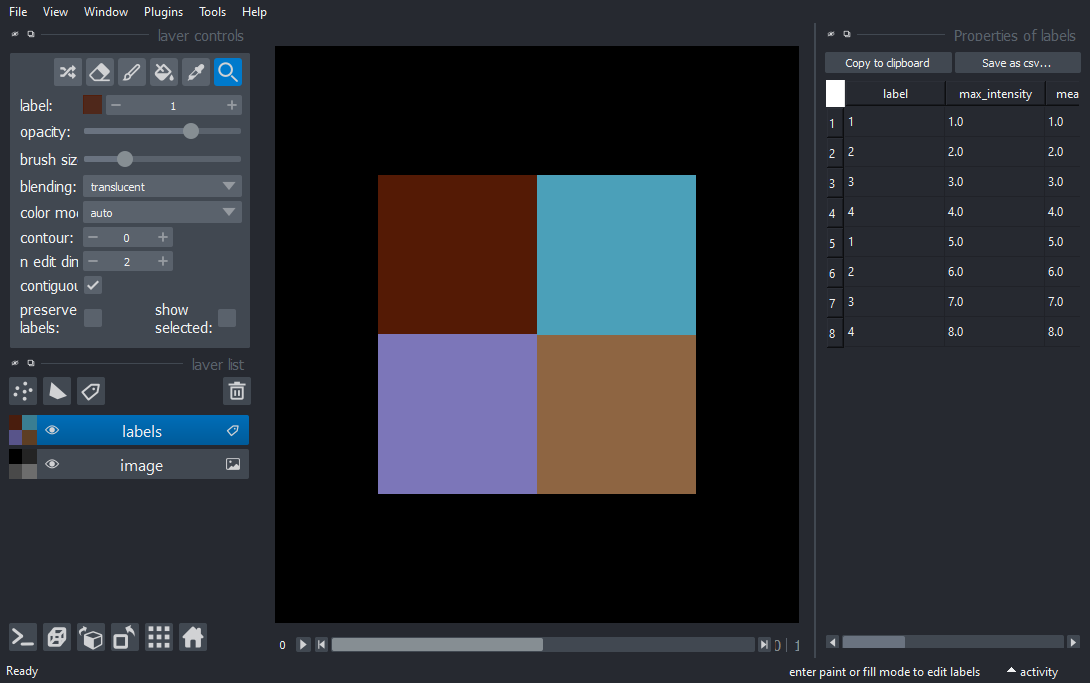

In [10]:
napari.utils.nbscreenshot(viewer)